# This Project serves as the last portfolio project as part of the [Codecademy](https://www.codecademy.com/career-journey/data-scientist-ml) data science: machine learning specialist career path and aims to independently analzye the data from a source called "OKCupid"
--------------------------------
### "The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. However, the questions you ask and how you answer them are entirely up to you."


## More about the idea:
   > `from the direct Codecademy source` : In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance. In this portfolio project, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


Althought the dataset revolves around the concept of dating I want to re-direct the vector of attention to aspects that fit me as a person and my beliefs thus shifting it into "Recommend a Peer". The usual steps including Data Preprocessing, Exploratory Data Analysis, Machine Learning Model Selection, Evaluation, and Tuning, will be followed. The `Scope` ultimately is to showcase what I learnt throughtout the careerpath. I also plan to refactor the code to accomodate the concept of pipelines and explore deploying it for a more practical feel further down the line.

To be more specific this project, utilizes three machine learning models in order to achieve different goals:

    > Predicting a feature about a user based on data available
    > Grouping users in order to recognize patterns
    > A recommender model that recommendes a peer

## Current Planned Progression:

    1. Exploring the dataset
        1a. Basic Information
        1b. Data Types
        1c. Addressing features (Isolating and Dropping features) 
    2. Data Preprocessing
        2a. Nulls
        2b. Outliers
        2c. Formatting Issues
        .. extra
    3. Exploratory Data Analysis
        3a. Understanding the Age distribution
        3b. Eating habits (relation with body type?)
        3c. Usage of Prohibited materials (affects on health)
        3d. Frequency of Education (across ages) - (edu vs income)
        3e. Frequency of Jobs - (Jobs vs incomes) - (Max vs Min Jobs)
        3f. Frequency and Proportions of Locations (Average income and height per location) - (Highest Frequency Job in each Location)
        3g. Activity on the site - (Activity per location)
        3h. Is there an association between having pet and a child? (exploring different associations)
        ... exploring hypothesis tests 
        ... exploring exploring further associations 
        ... exploring feature engineering before feeding them into the machine learning models

    4. Machine Learning Model
        I plan on using 3 models to predict:
            >  If the use would be a smoker or not (Supervised)
            >  Group Users in order to discover patterns (Unsupervised)
            >  Recommend a user based on common attributed (Supervised)

        ... a very basic start that would lead to evaluation then tuning later on.

### As Always importing basic libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the Dataset

In [57]:
Ind = pd.read_csv("profiles.csv")

In [58]:
Ind.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [59]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

Features' Dtypes are within reason but would like to inspect income to understand the values that are present inside.

In [60]:
Ind.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

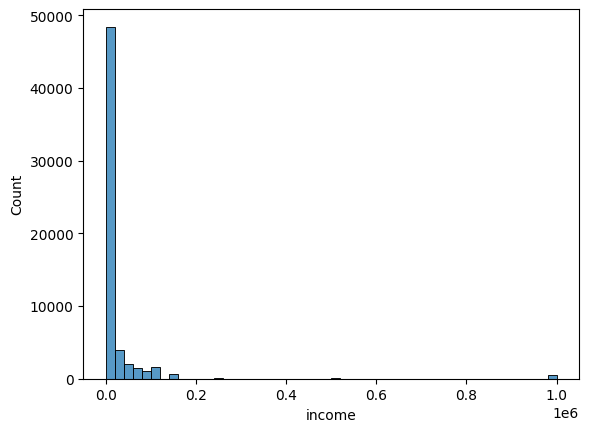

<Figure size 640x480 with 0 Axes>

In [61]:
sns.histplot(Ind.income, bins=50)
plt.plot()
plt.show()
plt.clf()

## Pandas recorded int64 for this feature as there are no values with decimals. The other intriguing thing is the appearane of a `-1` in the data indicating a probable missing value that should be either imputed or removed

## A very effective way is to look at a description

In [62]:
Ind.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


## Yikes a very minimal table yet lengthy description. The income feature confirms what we looked at there are many `-1` values probably indicating a missing value and a whooping `1000000.000000` value that could be an outlier. The height feature has a minimum of `1` which does not make any sense so that feature should be inspected as well.

In [63]:
Ind.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

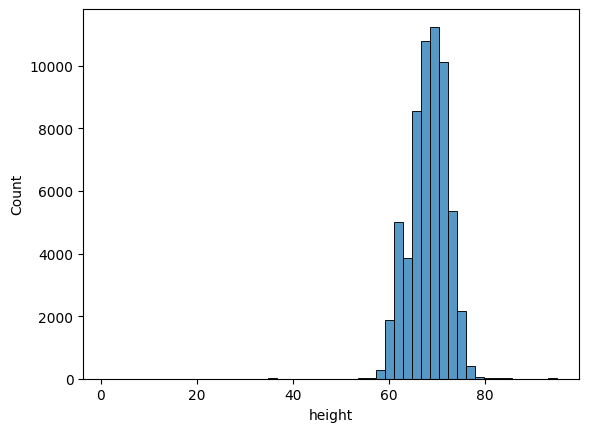

<Figure size 640x480 with 0 Axes>

In [64]:
sns.histplot(Ind.height, bins=50) 
plt.plot()
plt.show()
plt.clf()

## As seen by both the output of the .unique() method and the histogram plot there are values that do not make sense like the `1.` we saw that needs to be taken care of during pre-processing.

# Regarding features

> I plan to Isolate all `essay` variables in one dataframe until further down the line as NLP will be more involved.
    
> I do not plan on using the `orientation`, `religion`, 'status`,`sign` features. 

In [65]:
essays = Ind[Ind.filter(regex = "essay[0-9]").columns]
essays.columns

Index(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9'],
      dtype='object')

In [66]:
Ind.drop(Ind.filter(regex = "essay[0-9]").columns, axis=1,inplace=True)

In [67]:
Ind.drop(['orientation','religion','status','sign'],axis=1,inplace=True)

In [68]:
Ind.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'pets', 'sex', 'smokes', 'speaks'],
      dtype='object')

In [69]:
Ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  pets         40025 non-null  object 
 14  sex          59946 non-null  object 
 15  smokes       54434 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


# Data Preprocessing

## Any missing values?
### In addition to values that could be indicative of a missing/incorrect value in the `income` and `height` fields. It is needed to address NaN (null) values in the dataset

In [70]:
Ind.isna().any()

age            False
body_type       True
diet            True
drinks          True
drugs           True
education       True
ethnicity       True
height          True
income         False
job             True
last_online    False
location       False
offspring       True
pets            True
sex            False
smokes          True
speaks          True
dtype: bool

In [71]:
Ind.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
sex                0
smokes          5512
speaks            50
dtype: int64

### In terms of categorical features, I will simply replace all null values with an 'unknown' to avoid potentially introducing high bias into the dataset. For `height` (A numeric feature) I will remove these observations as they very low in number.

In [72]:
categorical_cols = list(Ind.select_dtypes(include = 'object').columns)
numeric_cols = list(Ind.select_dtypes(include = ['int64','float64']).columns)
Ind[categorical_cols] = Ind[categorical_cols].fillna('unknown')

In [73]:
categorical_cols

['body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'job',
 'last_online',
 'location',
 'offspring',
 'pets',
 'sex',
 'smokes',
 'speaks']

In [74]:
numeric_cols

['age', 'height', 'income']

In [75]:
Ind.dropna(subset=['height'],axis=0,inplace=True)

In [76]:
Ind.isna().any()

age            False
body_type      False
diet           False
drinks         False
drugs          False
education      False
ethnicity      False
height         False
income         False
job            False
last_online    False
location       False
offspring      False
pets           False
sex            False
smokes         False
speaks         False
dtype: bool

### Additionaly I want to check on both `height` and `income` values that were viewed before.

In [77]:
Ind.height.value_counts().sort_index()

height
1.0        1
3.0        1
4.0        1
6.0        1
8.0        1
9.0        1
26.0       1
36.0      11
37.0       2
42.0       1
43.0       2
47.0       1
48.0       2
49.0       1
50.0       2
51.0       1
52.0       1
53.0       5
54.0       3
55.0       6
56.0       8
57.0      17
58.0      53
59.0     212
60.0     791
61.0    1090
62.0    2244
63.0    2767
64.0    3865
65.0    3794
66.0    4759
67.0    5354
68.0    5449
69.0    5179
70.0    6074
71.0    4826
72.0    5315
73.0    2815
74.0    2547
75.0    1382
76.0     783
77.0     280
78.0     132
79.0      57
80.0      27
81.0      11
82.0      11
83.0      12
84.0       9
85.0       1
86.0       1
87.0       1
88.0       2
89.0       1
90.0       1
91.0       3
92.0       1
93.0       1
94.0       3
95.0      20
Name: count, dtype: int64

### I am under the assumption that very low heights (in inches) are incorrect. I will conclude all heights under 48 inches as erroneous and then inspect distributions later on.   (Needs more explaining)

In [78]:
Ind = Ind[Ind.height >= 48.0]

In [80]:
# Once more re-inspecting the unqiue values in income
Ind.income.unique()

array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [81]:
Ind.income.value_counts()

income
-1          48422
 20000       2950
 100000      1621
 80000       1110
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       630
 1000000      518
 250000       149
 500000        48
Name: count, dtype: int64

### A lot of -1 values that's for sure. This leads me to believe that this data is not missing at random (MNAR) and many do not like to share important aspects like their income. I will leave it be moving forward.

You could inspect the following [BLOG](https://medium.com/analytics-vidhya/different-types-of-missing-data-59c87c046bf7) for more information on missing types of data. 

# Moving onto outliers inspection.

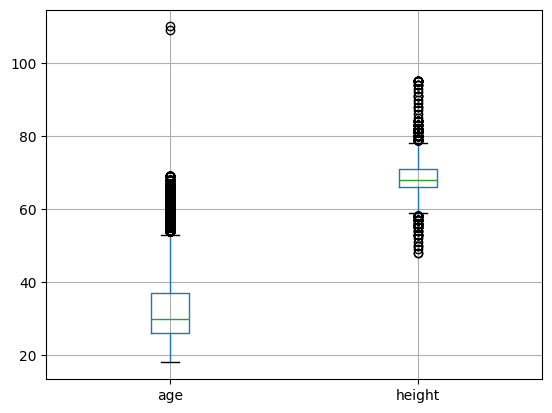

<Figure size 640x480 with 0 Axes>

In [88]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

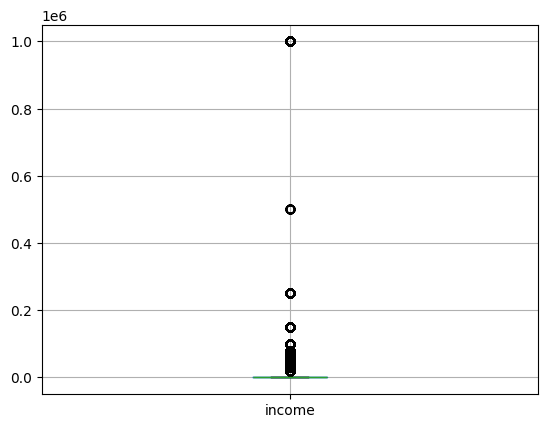

<Figure size 640x480 with 0 Axes>

In [89]:
Ind[['income']].boxplot()
plt.show()
plt.clf()

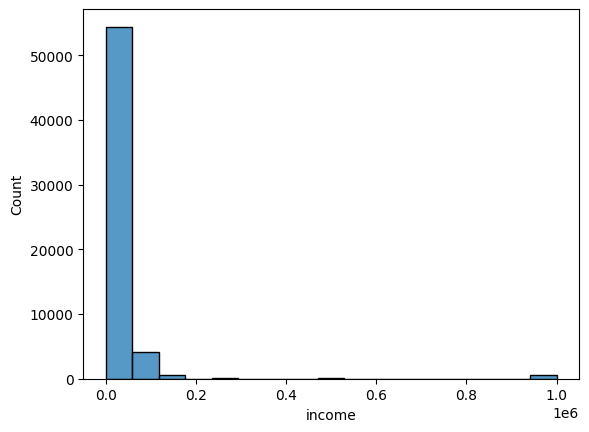

<Figure size 640x480 with 0 Axes>

In [91]:
sns.histplot(Ind.income)
plt.show()
plt.clf()

#### Boxplots and Hisograms can help you eye-catch outliers. I separated `income` from both `age` and `height` as it is in a higher scale (A this early point, we must consider scaling them later on is important)

#### `age` and `income` showcase values that appear to be extreme thus the need to deal with them. A simple way to is to clip those two features then observe the results for further actions.

####  Within the `heights` boxplot, the values (indicated  by black circles) could represent an actual person that is very tall/short so I won't consider limiting this feature further. 

In [110]:
def remove_outliers(df,cols):
    feature_bounds = {}
    for feature in cols:
        Q1 = np.percentile(df[feature],25)
        Q3 = np.percentile(df[feature],75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.8 * IQR 
        upper_bound = Q3 + 1.8 * IQR
        df[feature] = np.clip(df[feature], lower_bound, upper_bound)
        feature_bounds[feature] = (lower_bound,upper_bound)
    return feature_bounds

In [111]:
feature_bounds = remove_outliers(Ind,['age','income'])
feature_bounds

{'age': (6.199999999999999, 56.8), 'income': (-1.0, -1.0)}

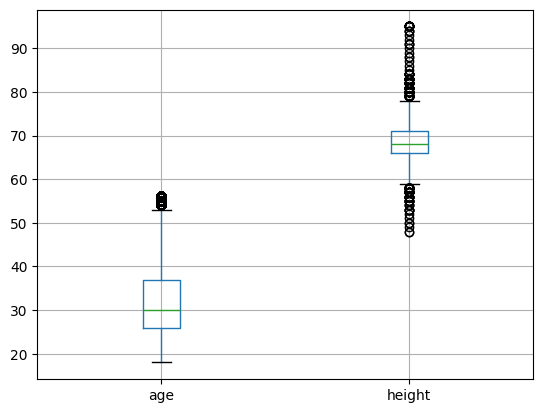

<Figure size 640x480 with 0 Axes>

In [108]:
Ind[[col for col in numeric_cols if col != 'income']].boxplot()
plt.show()
plt.clf()

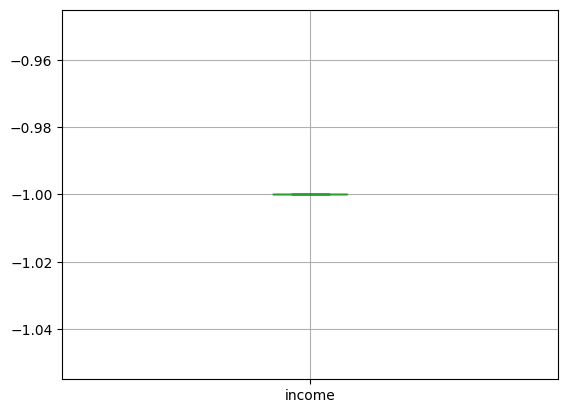

<Figure size 640x480 with 0 Axes>

In [109]:
Ind[['income']].boxplot()
plt.show()
plt.clf()

In [113]:
### Check again on what to do with income, do I separate the -1 into a new category and then make them nan in the original values ? what should I do?
